Libraries

In [36]:
# IMPORTS

import numpy as np
import pandas as pd

import math as m

import matplotlib.pyplot as plt

import seaborn as sns
sns.set_theme()

v = 1.2e7
t = 2.5e-16
d = 1e-6

N = d/v/t
print(N)

333.3333333333333


System data

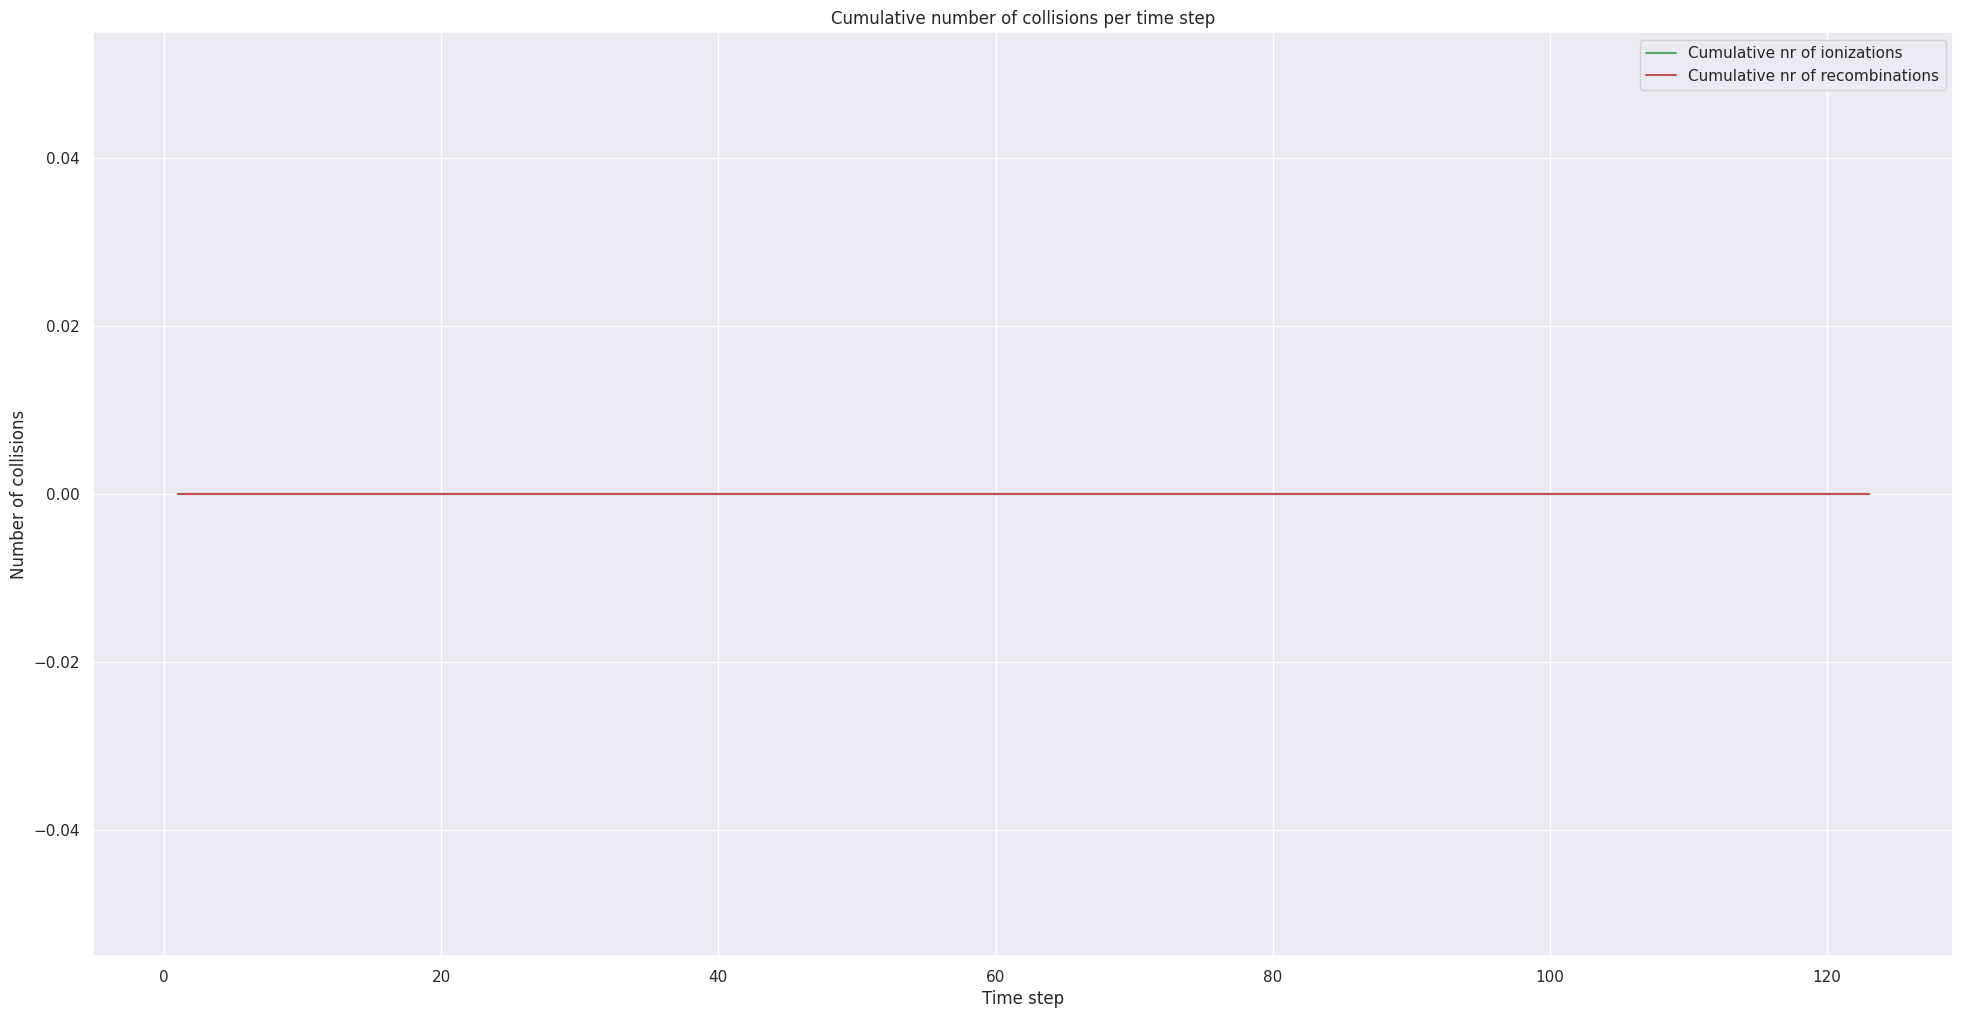

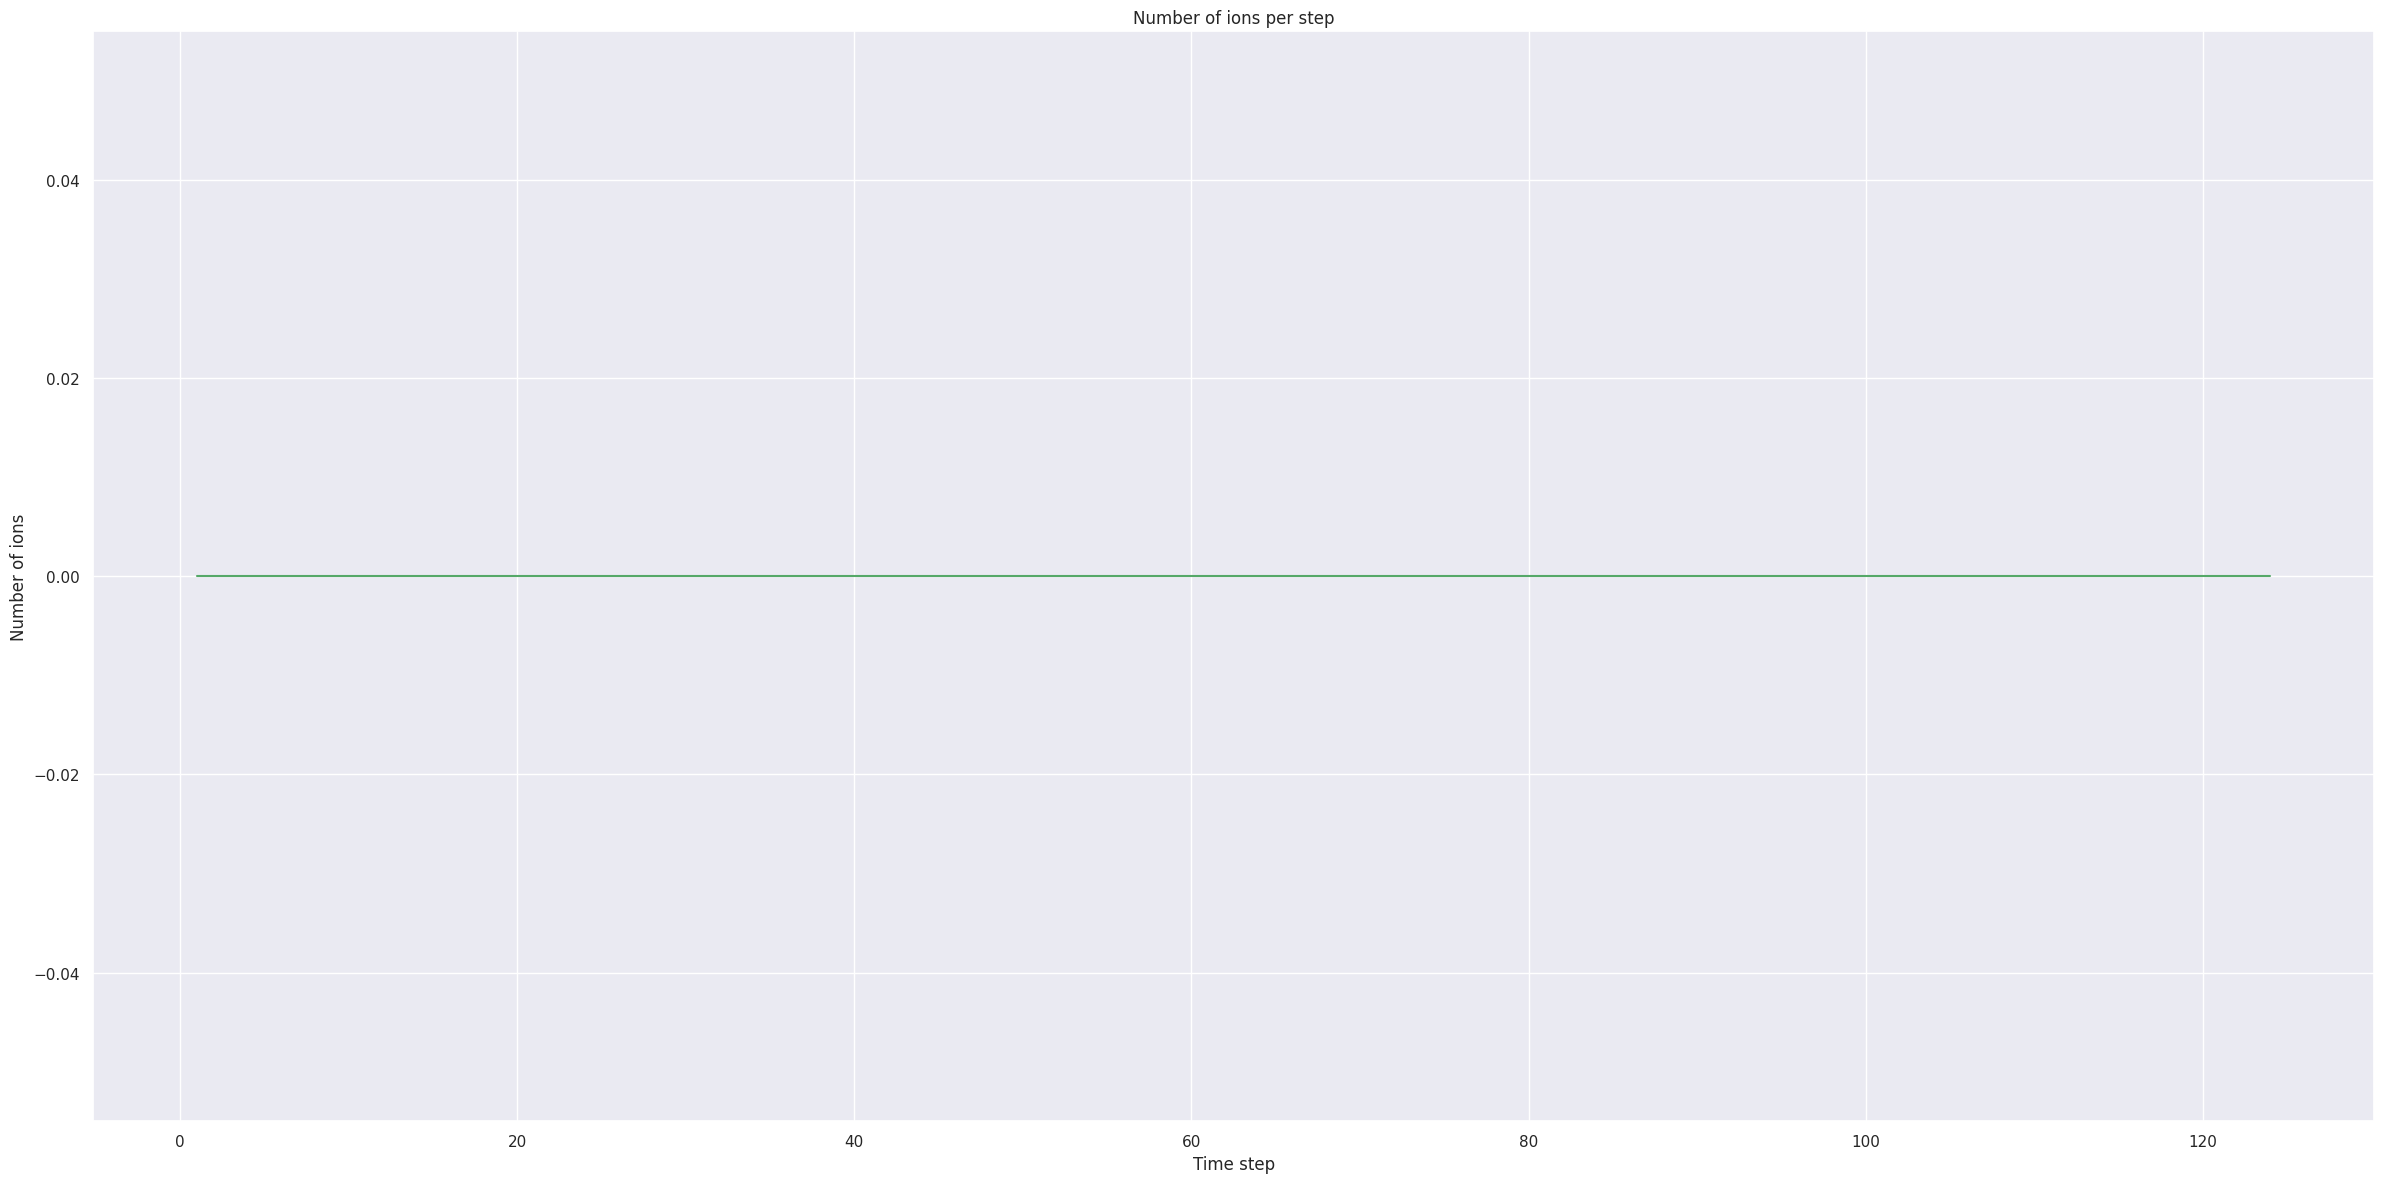

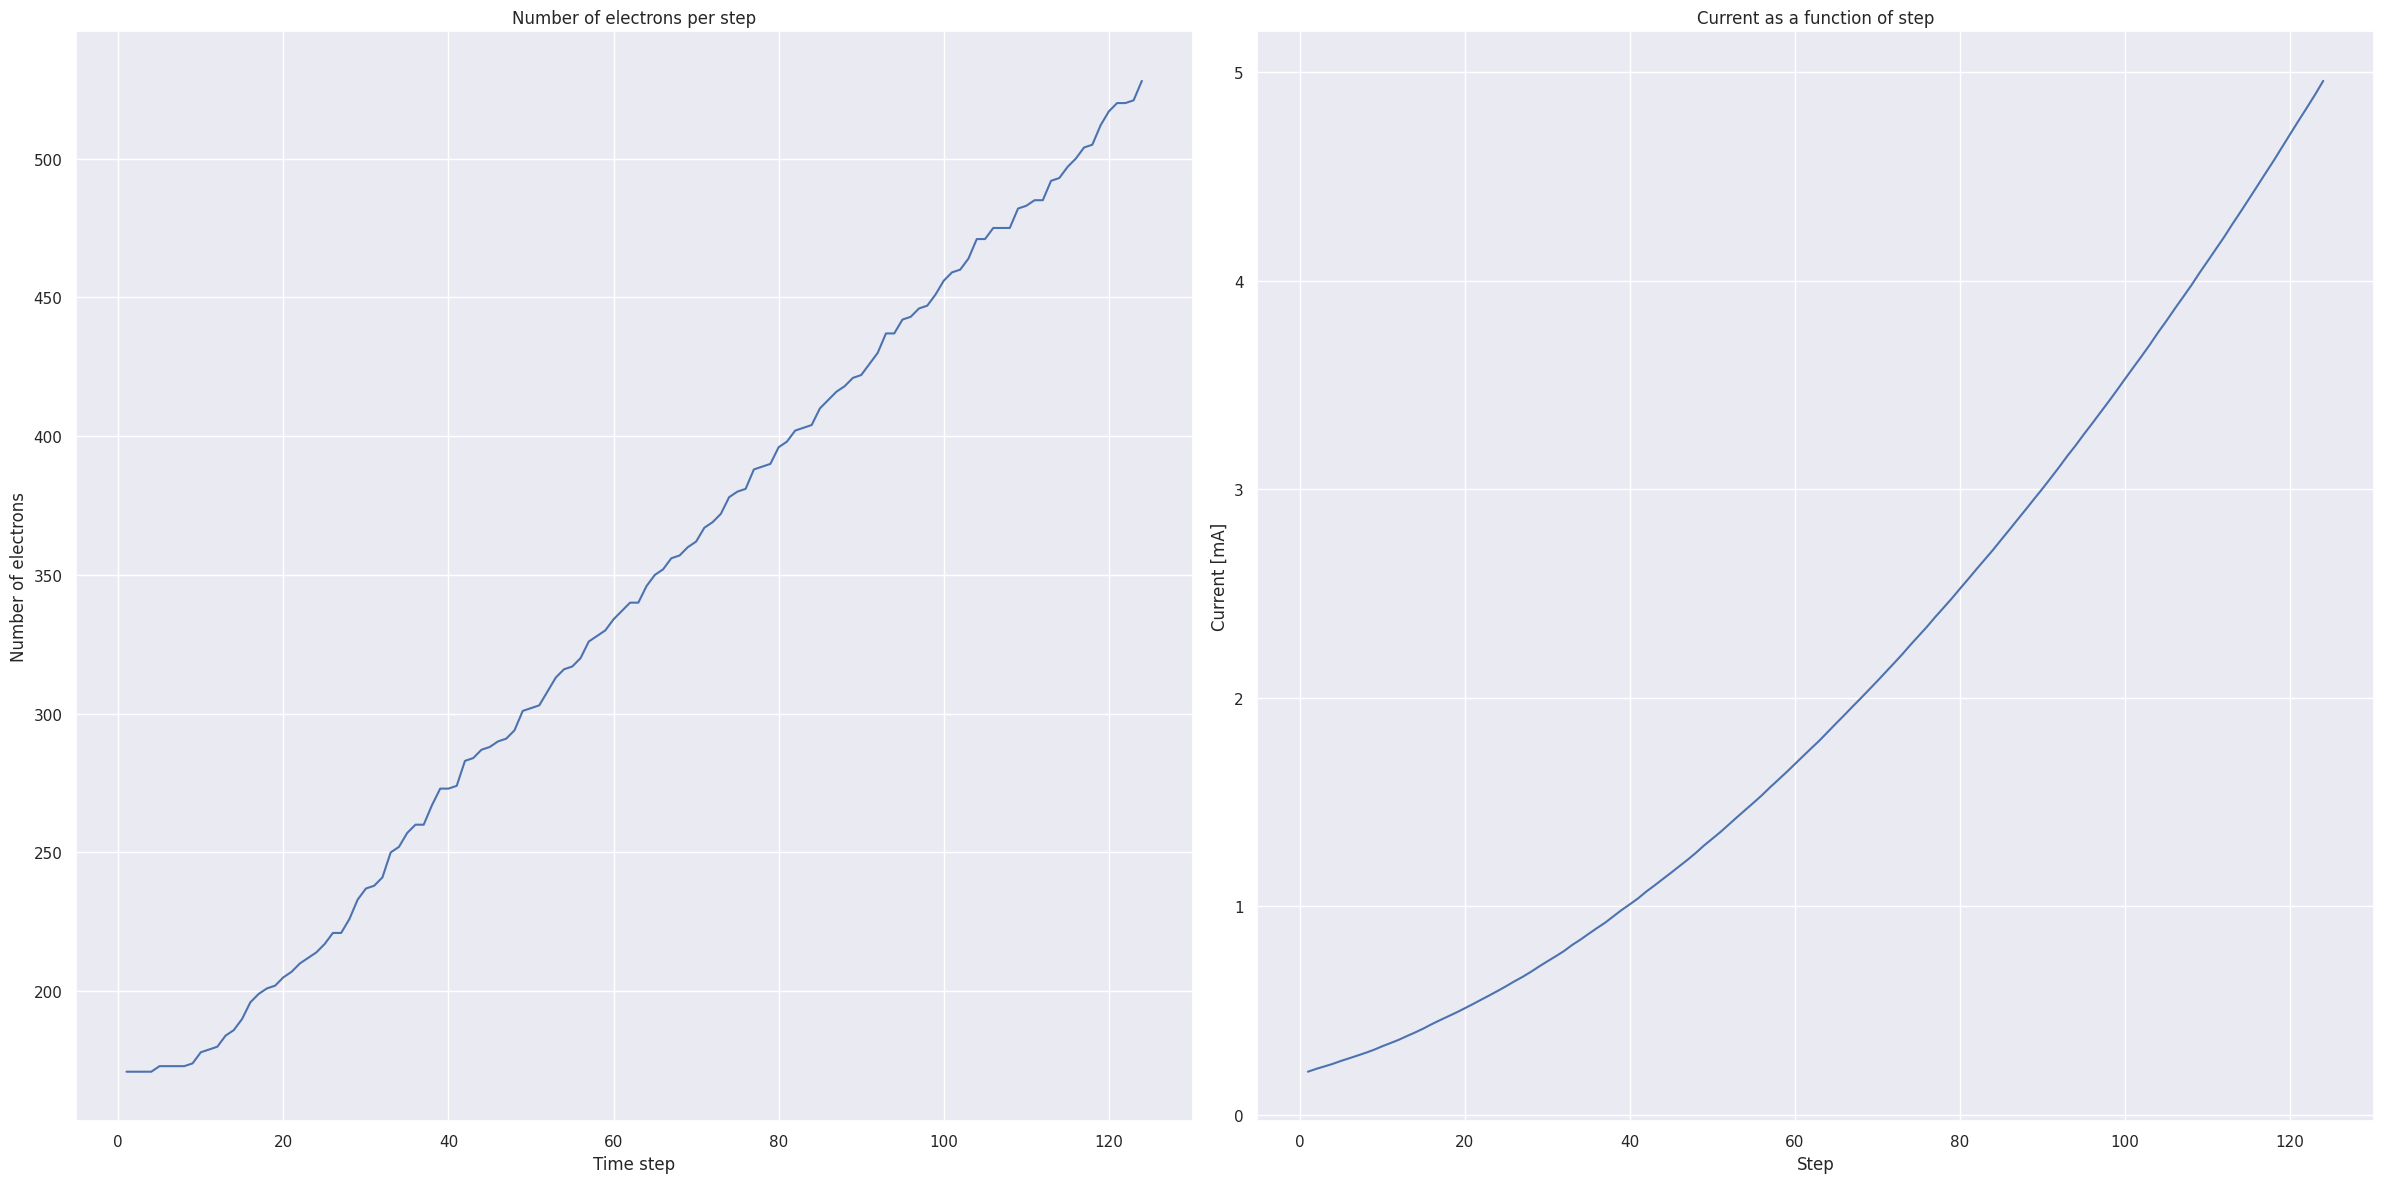

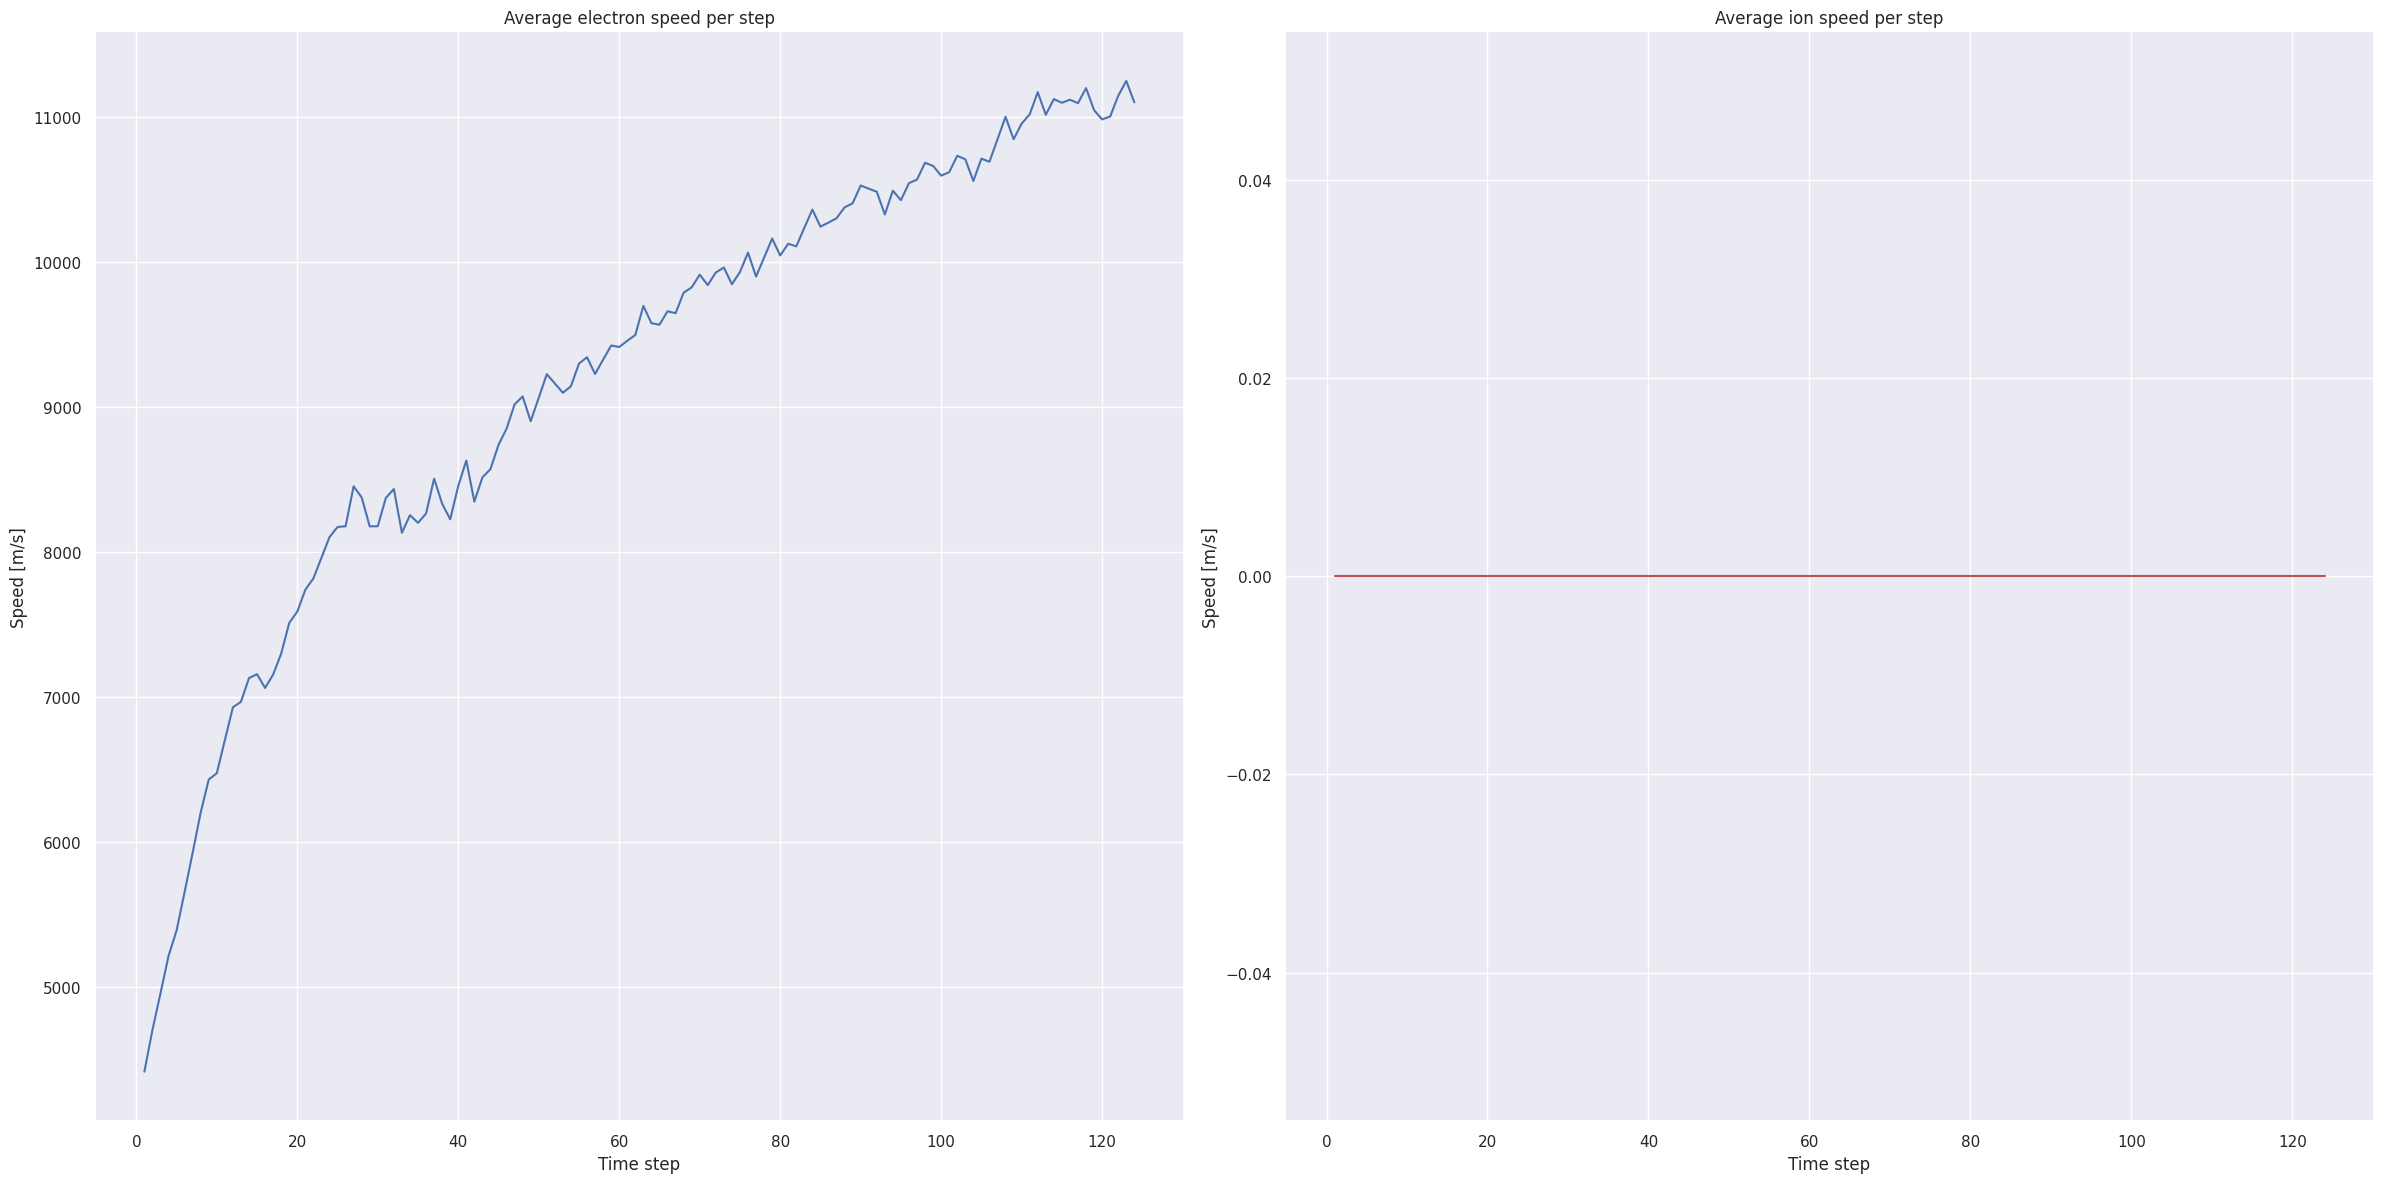

In [37]:
mass = 9.10938356e-31 # kg
q = 1.60217662e-19 # C

# Collisions
# Read the data into a pandas dataframe
filename = '../out/collisions.dt'
df_coll = pd.read_csv(filepath_or_buffer=filename, index_col=1, delim_whitespace=True, \
                    header=None, names=['step', 'nrColl', 'nrIon', 'nrRecom'])

# Plot a cumulative plot of nrIon and nrRecom
plt.figure(figsize=(24, 12))
plt.plot(df_coll['step'], df_coll['nrIon'].cumsum(), label='Cumulative nr of ionizations', color='g')
plt.plot(df_coll['step'], df_coll['nrRecom'].cumsum(), label='Cumulative nr of recombinations', color='r')
plt.xlabel('Time step')
plt.ylabel('Number of collisions')
plt.title('Cumulative number of collisions per time step')
plt.legend()
plt.show()

# Ramo current
# Read the data into a pandas dataframe
filename = '../out/ramo_current.dt'
df_cur = pd.read_csv(filepath_or_buffer=filename, index_col = 1,delim_whitespace=True, \
                    header=None, names=['time', 'step', 'current', 'volt', 'nrPart', 'nrElec', 'nrIon', 'avg_mob', 'avg_part_speed','avg_elec_speed','avg_ion_speed','a','b','c'])

# Plot distribution of kramers radii
plt.figure(figsize=(24, 12)) 
plt.plot(df_cur.index, df_cur['nrIon'], label='nrIon', color='g')
plt.xlabel('Time step')
plt.ylabel('Number of ions')
plt.title('Number of ions per step')
plt.tight_layout()  # Adjust the spacing between subplots
plt.show()

# Plot distribution of distances
plt.figure(figsize=(24, 12)) 
plt.subplot(1,2,1)
plt.plot(df_cur.index, df_cur['nrElec'], label='nrElec', color='b')
plt.xlabel('Time step')
plt.ylabel('Number of electrons')
plt.title('Number of electrons per step')

plt.subplot(1,2,2)
plt.plot(df_cur.index, df_cur['current']*1e3, label='Current')
plt.xlabel('Step')
plt.ylabel('Current [mA]')
plt.title('Current as a function of step')
plt.tight_layout()
plt.show()

plt.figure(figsize=(24, 12))  # Increase the figure size
# Plot distribution of distances
plt.subplot(1, 2, 1)
plt.plot(df_cur.index, df_cur['avg_elec_speed'], c='b',label='Electron speed')
plt.xlabel('Time step')
plt.ylabel('Speed [m/s]')
plt.title('Average electron speed per step')

# Plot distribution of kramers radii
plt.subplot(1, 2, 2)
plt.plot(df_cur.index, df_cur['avg_ion_speed'], c='r',label='Ion speed')
plt.xlabel('Time step')
plt.ylabel('Speed [m/s]')
plt.title('Average ion speed per step')
plt.tight_layout() 
plt.show()


Collision data

Number of ionizations: 0
From ionization: 0. From photo emission: 0

Number of recombinations: 0
From ion emission: 0. From photo emission: 0
Average lifetime of recombined ions: nan

Colliding electron recombines with newly created ion: 0
Released electron recombines with newly created ion: 0



/home/arnar/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/arnar/.local/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


ValueError: max() arg is an empty sequence

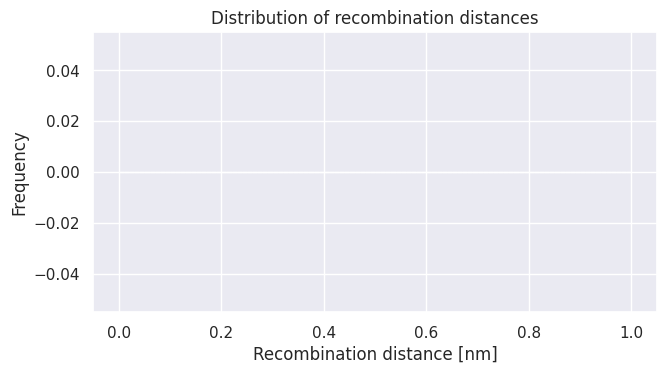

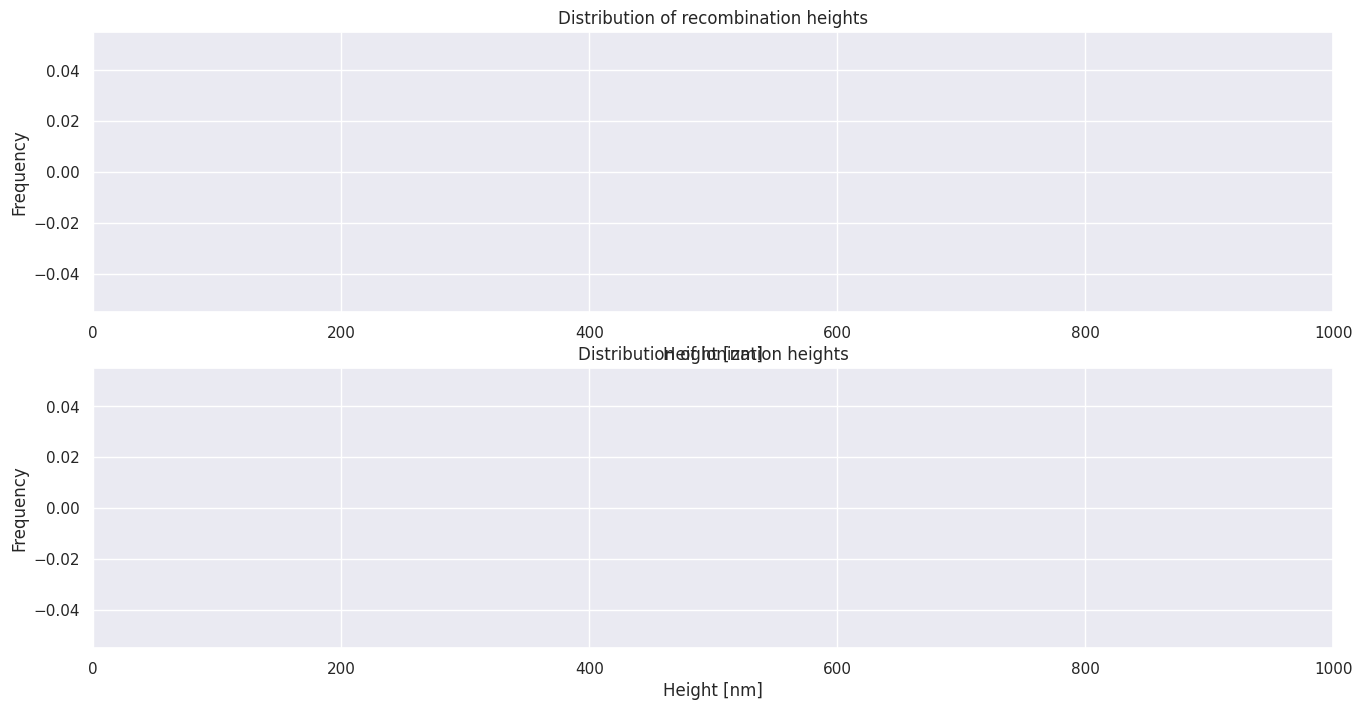

In [38]:

recombinations = 0
recom_heights = []
recom_speeds = []
recom_dists = []
recom_kramers = []
recom_from_ion = 0
recom_from_photo = 0
recom_id_pairs = []
recom_life = []
recom_from_ion_heights = []
recom_from_photo_heights = []

filename = '../out/recombination_data.bin'
with open(filename, 'rb') as f:
    while True:
        try:
            step = np.fromfile(file=f, count=1, dtype=np.int32)
            x, y, z, vel, dist, kramers = np.fromfile(file=f, count=6, dtype=np.float64)
            elecID, ionID, elecEmit, life = np.fromfile(file=f, count=4, dtype=np.int32)
        except:
            break
        recom_heights.append(z*1e9)
        recom_speeds.append(vel)
        recom_dists.append(dist*1e9)
        recom_kramers.append(kramers*1e9)
        recom_id_pairs.append((elecID, ionID))
        recom_life.append(int(life))
        recombinations += 1
        if elecEmit == 1:
            recom_from_photo += 1
            recom_from_photo_heights.append(z*1e9)
        elif elecEmit == 100:
            recom_from_ion += 1
            recom_from_ion_heights.append(z*1e9)

ionizations = 0
ion_from_ion = 0
ion_from_photo = 0
ion_id_trios = []
inVels = []
outVels = []
newVels = []
ion_heights = []

filename = '../out/ionization_data.bin'
with open(filename, 'rb') as f:
    while True:
        try:
            step = np.fromfile(file=f, count=1, dtype=np.int32)
            x,y,z,inVel,outVel,newVel,ion_dist,ion_rad = np.fromfile(file=f, count=8, dtype=np.float64)
            inID,newID,ionID,emitter = np.fromfile(file=f,count=4,dtype=np.int32)
        except:
            break
        ionizations += 1
        inVels.append(inVel)
        outVels.append(outVel)
        newVels.append(newVel)
        ion_heights.append(z*1e9)
        ion_id_trios.append((inID,newID,ionID))
        if emitter == 100:
            ion_from_ion += 1
        else:
            ion_from_photo += 1 

recom_from_collided_ion = 0
recom_from_released_ion = 0
for pair, trio in zip(recom_id_pairs, ion_id_trios):
    if pair[1] == trio[2]:
        if pair[0] == trio[0] :
            recom_from_collided_ion += 1
        elif pair[0] == trio[1]:
            recom_from_released_ion += 1 
            
print(f'Number of ionizations: {ionizations}')
print(f'From ionization: {ion_from_ion}. From photo emission: {ion_from_photo}')
print('')

print(f'Number of recombinations: {recombinations}')
print(f'From ion emission: {recom_from_ion}. From photo emission: {recom_from_photo}')
print(f'Average lifetime of recombined ions: {np.mean(recom_life)}')
print('')

print(f'Colliding electron recombines with newly created ion: {recom_from_collided_ion}')
print(f'Released electron recombines with newly created ion: {recom_from_released_ion}')    
print('')

try:
    plt.figure(figsize=(16, 8))  # Increase the figure size
    # Plot distribution of distances
    plt.subplot(2, 2, 1)
    data = recom_dists
    unit = 'nm'
    plt.hist(recom_dists, bins=100)
    plt.xlabel(f'Recombination distance [{unit}]')
    plt.ylabel('Frequency')
    plt.title('Distribution of recombination distances')
    textbox = f'Mean: {np.median(data):.2f} {unit}' + '\n' + f'Maximum: {max(data):.2f} {unit}' + '\n' + f'Minimum: {min(data):.2f} {unit}'
    plt.text(plt.xlim()[1]*0.8, plt.ylim()[1]*0.8, textbox, fontsize=12)
    plt.yscale('log')  # Set the y-axis scale to log

    # Plot distribution of kramers radii
    plt.subplot(2, 2, 2)
    data = recom_kramers
    unit = 'nm'
    plt.hist(data, bins=100)
    plt.xlabel(f'Kramers Radius [{unit}]')
    plt.ylabel('Frequency')
    plt.title('Distribution of recombination kramers radii')
    textbox = f'Mean: {np.median(data):.2f} {unit}' + '\n' + f'Maximum: {max(data):.2f} {unit}' + '\n' + f'Minimum: {min(data):.2f} {unit}'
    plt.text(plt.xlim()[1]*0.8, plt.ylim()[1]*0.8, textbox, fontsize=12)
    plt.yscale('log')  # Set the y-axis scale to log

    # Plot distribution of speeds
    plt.subplot(2, 2, (3,4))
    data = recom_speeds
    unit = 'm/s'
    plt.hist(data, bins=100)
    plt.xlabel(f'Speed [{unit}]')
    plt.ylabel('Frequency')
    plt.title('Distribution of recombination speeds')
    textbox = f'Mean: {np.median(data):.2f} {unit}' + '\n' + f'Maximum: {max(data):.2f} {unit}' + '\n' + f'Minimum: {min(data):.2f} {unit}'
    plt.text(plt.xlim()[1]*0.8, plt.ylim()[1]*0.8, textbox, fontsize=12)
    # plt.yscale('log')  # Set the y-axis scale to log

    plt.tight_layout()
    plt.show()

    plt.figure(figsize = (16,8))
    plt.subplot(2, 1, 1)
    data = recom_from_ion_heights
    unit = 'nm'
    plt.hist(data, bins=100)
    plt.xlim(0,1000)
    plt.xlabel(f'Height [{unit}]')
    plt.ylabel('Frequency')
    plt.title('Distribution of recombination heights from ionization')
    textbox = f'Mean: {np.median(data):.2f} {unit}' + '\n' + f'Maximum: {max(data):.2f} {unit}' + '\n' + f'Minimum: {min(data):.2f} {unit}'
    plt.text(plt.xlim()[1]*0.8, plt.ylim()[1]*0.8, textbox, fontsize=12)
    # plt.yscale('log')  # Set the y-axis scale to log

    plt.subplot(2, 1, 2)
    data = recom_from_photo_heights
    unit = 'nm'
    plt.hist(data, bins=100)
    plt.xlim(0,1000)
    plt.xlabel(f'Height [{unit}]')
    plt.ylabel('Frequency')
    plt.title('Distribution of recombination heights from photo emission')
    textbox = f'Mean: {np.median(data):.2f} {unit}' + '\n' + f'Maximum: {max(data):.2f} {unit}' + '\n' + f'Minimum: {min(data):.2f} {unit}'
    plt.text(plt.xlim()[1]*0.8, plt.ylim()[1]*0.8, textbox, fontsize=12)

    plt.tight_layout()
    plt.show()
except:
    pass

plt.figure(figsize = (16,8))
plt.subplot(2, 1, 1)
try:
    data = recom_heights
    unit = 'nm'
    plt.hist(data, bins=100)
    plt.xlim(0,1000)
    plt.xlabel(f'Height [{unit}]')
    plt.ylabel('Frequency')
    plt.title('Distribution of recombination heights')
    textbox = f'Mean: {np.median(data):.2f} {unit}' + '\n' + f'Maximum: {max(data):.2f} {unit}' + '\n' + f'Minimum: {min(data):.2f} {unit}'
    plt.text(plt.xlim()[1]*0.8, plt.ylim()[1]*0.8, textbox, fontsize=12)
    # plt.yscale('log')  # Set the y-axis scale to log
except:
    pass

plt.subplot(2, 1, 2)
data = ion_heights
unit = 'nm'
plt.hist(data, bins=100)
plt.xlim(0,1000)
plt.xlabel(f'Height [{unit}]')
plt.ylabel('Frequency')
plt.title('Distribution of ionization heights')
textbox = f'Mean: {np.median(data):.2f} {unit}' + '\n' + f'Maximum: {max(data):.2f} {unit}' + '\n' + f'Minimum: {min(data):.2f} {unit}'
plt.text(plt.xlim()[1]*0.8, plt.ylim()[1]*0.8, textbox, fontsize=12)

plt.tight_layout()
plt.show()

plt.figure(figsize=(16, 8))  # Increase the figure size

plt.subplot(1, 3, 1)

data = inVels
unit = 'm/s'
plt.hist(inVels,bins=100)
plt.xlabel(f'Speed [{unit}]')
plt.ylabel('Frequency')
plt.title('Distribution of collision speed')
textbox = f'Mean: {np.median(data):.2f} {unit}' + '\n' + f'Maximum: {max(data):.2f} {unit}' + '\n' + f'Minimum: {min(data):.2f} {unit}'
plt.text(plt.xlim()[1]*0.8, plt.ylim()[1]*0.8, textbox, fontsize=12)
# plt.yscale('log')  # Set the y-axis scale to log

plt.subplot(1, 3, 2)
data = outVels
unit = 'm/s'
plt.hist(data,bins=100)
plt.xlabel(f'Speed [{unit}]')
plt.ylabel('Frequency')
plt.title('Distribution of deflection speed')
textbox = f'Mean: {np.median(data):.2f} {unit}' + '\n' + f'Maximum: {max(data):.2f} {unit}' + '\n' + f'Minimum: {min(data):.2f} {unit}'
plt.text(plt.xlim()[1]*0.8, plt.ylim()[1]*0.8, textbox, fontsize=12)
# plt.yscale('log')  # Set the y-axis scale to log

plt.subplot(1, 3, 3)
data = newVels
unit = 'm/s'
plt.hist(newVels,bins=100)
plt.xlabel(f'Speed [{unit}]')
plt.ylabel('Frequency')
plt.title('Distribution of ejection speeds')
textbox = f'Mean: {np.median(data):.2f} {unit}' + '\n' + f'Maximum: {max(data):.2f} {unit}' + '\n' + f'Minimum: {min(data):.2f} {unit}'
plt.text(plt.xlim()[1]*0.8, plt.ylim()[1]*0.8, textbox, fontsize=12)
# plt.yscale('log')  # Set the y-axis scale to log
plt.show()

# print(f'Average in speed: {np.mean(inVels)} m/s')
# print(f'Median in speed: {np.median(inVels)} m/s')
# print(f'Maximum in speed: {max(inVels)} m/s')
# print(f'Minimum in speeds: {min(inVels)} m/s')
# print('')

# print(f'Average out speed: {np.mean(outVels)} m/s')
# print(f'Median out speed: {np.median(outVels)} m/s')
# print(f'Maximum out speed: {max(outVels)} m/s')
# print(f'Minimum out speeds: {min(outVels)} m/s')
# print('')

# print(f'Average new speed: {np.mean(newVels)} m/s')
# print(f'Median in speed: {np.median(newVels)} m/s')
# print(f'Maximum new speed: {max(newVels)} m/s')
# print(f'Minimum new speeds: {min(newVels)} m/s')

# print(f'Median distance: {np.median(recom_dists)} nm')
# print(f'Mean distance: {np.mean(recom_dists)} nm')
# print(f'Maximum distance: {max(recom_dists)} nm')
# print(f'Minimum distance: {min(recom_dists)} nm')
# print('')

# print(f'Median speed: {np.median(recom_speeds)} m/s')
# print(f'Mean speed: {np.mean(recom_speeds)} nm')
# print(f'Maximum speed: {max(recom_speeds)} nm/s')
# print(f'Minimum speed: {min(recom_speeds)} nm/s')
# print('')

# print(f'Median kramers: {np.median(recom_kramers)} nm')
# print(f'Mean kramers: {np.mean(recom_kramers)} m')
# print(f'Maximum kramers: {max(recom_kramers)} nm')
# print(f'Minimum kramers: {min(recom_kramers)} nm')
# ax1.set_xlabel('x [nm]')
# ax1.set_ylabel('y [nm]')
# ax1.set_zlabel('z [nm]')


Atom 3d plot

In [1]:
step = 0
step_size = 500
while True:
    x_i = []
    y_i = []
    z_i = []
    x_a = []
    y_a = []
    z_a = []
    ions = 0
    atoms = 0
    step += step_size
    filename = '../out/atom'+str(step)+'.bin'
    try:
        with open(filename, 'rb') as f:
            fig = plt.figure(figsize=(16,16))
            ax = fig.add_subplot(111, projection='3d')
            while True:
                try:
                    x, y, z = np.fromfile(file=f, count=3, dtype=np.float64)
                    species = np.fromfile(file=f, count=1, dtype=np.int32)
                    if species == 2:
                        x_i.append(x*1e9)
                        y_i.append(y*1e9)
                        z_i.append(z*1e9)
                        ions += 1
                    else:
                        x_a.append(x*1e9)
                        y_a.append(y*1e9)
                        z_a.append(z*1e9)
                        atoms += 1
                except:
                    break
            ax.scatter(x_i, y_i, z_i, c='r', marker='o', s=10)
            ax.scatter(x_a, y_a, z_a, c='b', marker='o', s=0.1)
            plt.title(f'{atoms} atom(s) and {ions} ion(s) at step {step}')
            plt.show()
    except:
        break

Ion Positions

In [ ]:
step = 0
step_size = 500
while True:
    step += step_size
    filename = '../out/atom'+str(step)+'.bin'
    try:
        with open(filename, 'rb') as f:
            data = []
            while True:
                try:
                    x, y, z = np.fromfile(file=f, count=3, dtype=np.float64)
                    species = np.fromfile(file=f, count=1, dtype=np.int32)
                    if species == 2:
                        data.append(z*1e9)
                except:
                    break
        plt.figure(figsize=(16, 8))
        plt.hist(data, bins=100)
        plt.xlim(0, 1000)
        plt.xlabel(f'Height [{unit}]')
        plt.ylabel('Frequency')
        plt.title(f'Distribution of ion heights at step {step}')
        textbox = f'Mean: {np.median(data):.2f} {unit}' + '\n' + f'Maximum: {max(data):.2f} {unit}' + '\n' + f'Minimum: {min(data):.2f} {unit}'
        plt.text(plt.xlim()[1]*0.8, plt.ylim()[1]*0.8, textbox, fontsize=12)
        plt.show()
    except:
        break



<h3>Atom input

0


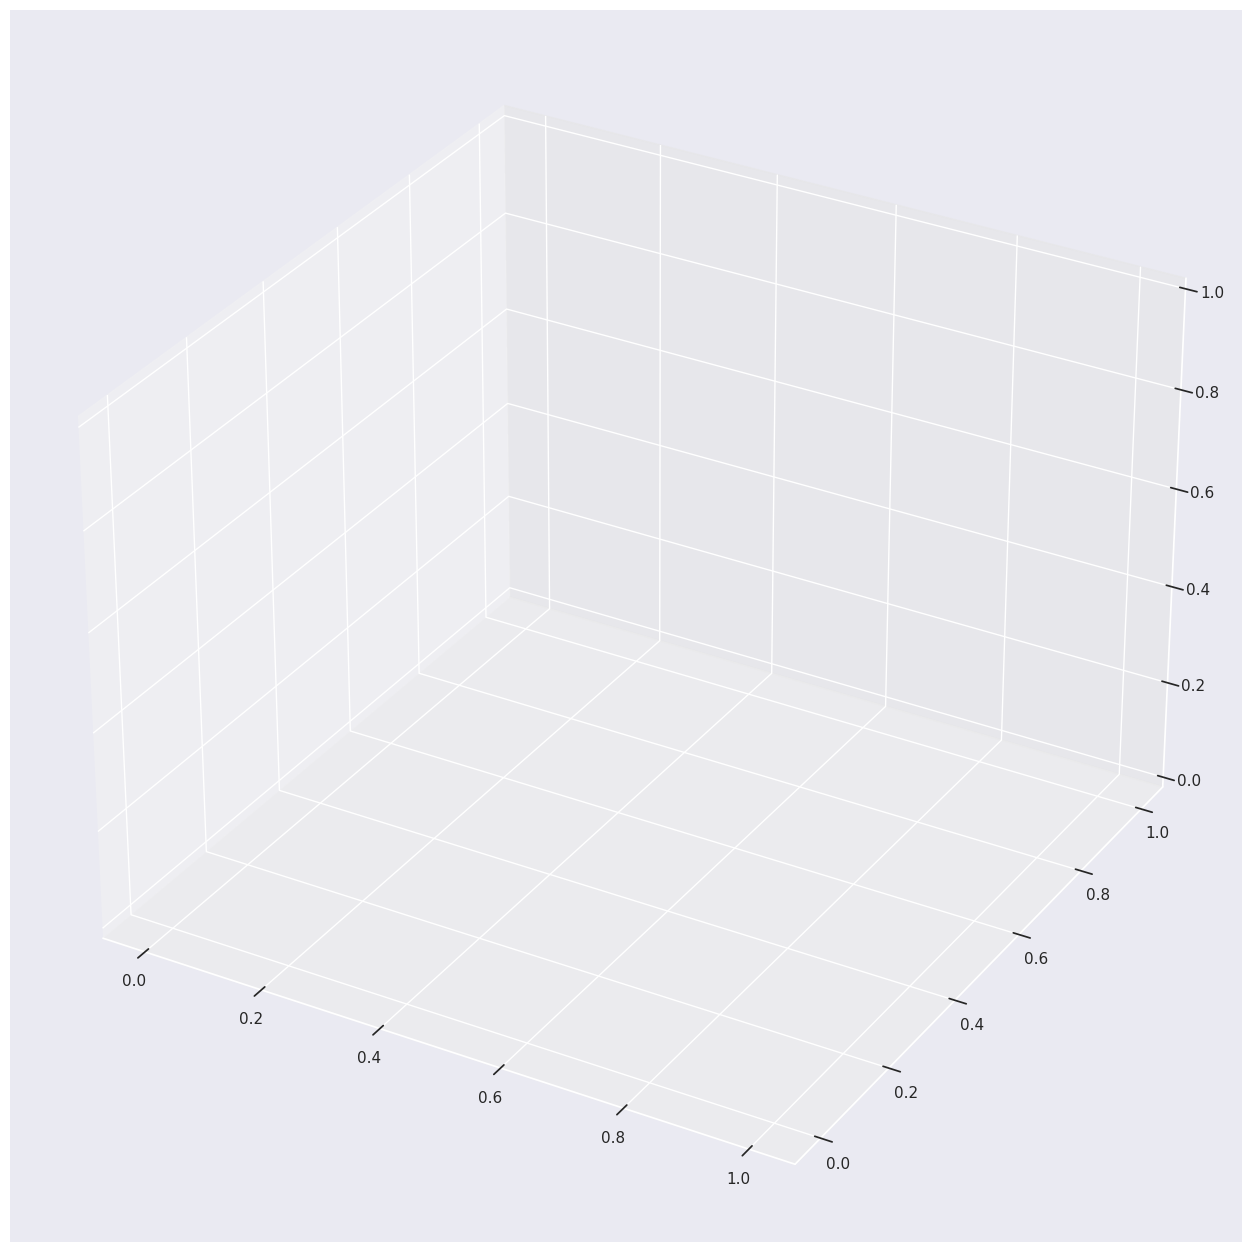

ValueError: min() arg is an empty sequence

In [ ]:
filename = '../out/density_emit_atom.bin'
xs = []
ys = []
zs = []
with open(filename, 'rb') as f:
    while True:
        try:
            x, y, z = np.fromfile(file=f, count=3, dtype=np.float64)
            id = np.fromfile(file=f, count=1, dtype=np.int32)
            xs.append(x*1e9)
            ys.append(y*1e9)
            zs.append(z*1e9)
        except:
            break
print(len(xs))
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, c='b', marker='o', s=0.5)
plt.show()
print(min(xs), max(xs))
print(min(ys), max(ys))
print(min(zs), max(zs))